In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32, [None,nb_classes])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
W1 = tf.Variable(tf.random_normal([784,nb_classes*2]),name='weight')
b1 = tf.Variable(tf.random_normal([nb_classes*2]),name='bias')
layer1 = tf.nn.softmax(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([nb_classes*2,nb_classes]),name='weight')
b2 = tf.Variable(tf.random_normal([nb_classes]),name='bias')
hypothesis = tf.nn.softmax(tf.matmul(layer1,W2)+b2)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

Epoch: 0001 cost = 2.729877933
Epoch: 0002 cost = 1.110868742
Epoch: 0003 cost = 0.885316064
Epoch: 0004 cost = 0.774226849
Epoch: 0005 cost = 0.703177625
Epoch: 0006 cost = 0.652871095
Epoch: 0007 cost = 0.615044244
Epoch: 0008 cost = 0.583921774
Epoch: 0009 cost = 0.559574022
Epoch: 0010 cost = 0.538196157
Epoch: 0011 cost = 0.520025070
Epoch: 0012 cost = 0.504753590
Epoch: 0013 cost = 0.491000175
Epoch: 0014 cost = 0.478664024
Epoch: 0015 cost = 0.467675304
Accuracy:  0.8867
Label:  [2]
Prediction:  [2]


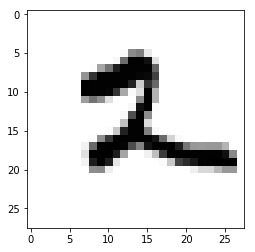

In [4]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],{X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print 'Epoch:', '%04d' % (epoch + 1),'cost =', '{:.9f}'.format(avg_cost)
    print "Accuracy: ", sess.run(accuracy, {X:mnist.test.images, Y:mnist.test.labels})
    # print "Accuracy: ", accuracy.eval(session=sess, {X:mnist.test.images, Y:mnist.test.labels})
    
    r = random.randint(0, mnist.test.num_examples -1)
    print "Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1))
    print "Prediction: ", sess.run(tf.argmax(hypothesis,1),{X:mnist.test.images[r:r+1]})
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()